In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/S&P500.csv', parse_dates = ['날짜'], thousands = ",")

In [2]:
df = data.drop(['Unnamed: 0', '오픈', '고가', '저가','거래량'], axis=1)
df.columns = ['Date', 'Close', 'Change']
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df = df[df['year'] != 1979].reset_index(drop=True)       #1979년 제거
df = df[df['year'] != 2023]
df['log'] = np.log(df['Close'] / df['Close'].shift(1))
df

,Date,Close,Change,year,month,log
0,1980-01-01,107.90,0.00%,1980,1,NaN
1,1980-01-02,105.80,-1.95%,1980,1,-0.019654
2,1980-01-03,105.20,-0.57%,1980,1,-0.005687
3,1980-01-04,106.50,1.24%,1980,1,0.012282
4,1980-01-07,106.80,0.28%,1980,1,0.002813
...,...,...,...,...,...,...
10841,2022-12-23,3844.82,0.59%,2022,12,0.005851
10842,2022-12-27,3829.25,-0.40%,2022,12,-0.004058
10843,2022-12-28,3783.22,-1.20%,2022,12,-0.012093
10844,2022-12-29,3849.28,1.75%,2022,12,0.017311


In [ ]:
tb = df.pivot_table(index = 'year', columns = 'month', values = 'log', aggfunc ='sum') #연도별/월별 변동률
tb.loc[:,'sum'] = tb.loc[:, 1:12].sum(axis=1)
tb

month,1,2,3,4,5,6,7,8,9,10,11,12,sum
year,,,,,,,,,,,,,
1980,0.056746,-0.004388,-0.107611,0.040313,0.045065,0.026621,0.063608,0.005735,0.025011,1.581061e-02,0.097091,-0.034024,0.229978
1981,-0.046730,0.013032,0.035170,-0.023811,-0.001507,-0.010614,-0.002289,-0.063877,-0.055244,4.788819e-02,0.035459,-0.029733,-0.102256
1982,-0.018107,-0.062547,-0.009774,0.038534,-0.039427,-0.020768,-0.023074,0.109553,0.007503,1.047790e-01,0.035272,0.015049,0.136992
1983,0.032882,0.019087,0.032550,0.071865,-0.012240,0.034497,-0.033266,0.011009,0.010288,-1.516559e-02,0.016970,-0.009055,0.159420
1984,-0.009138,-0.039319,0.013279,0.005637,-0.061171,0.017117,-0.016453,0.100905,-0.003606,3.694961e-16,-0.015166,0.021766,0.013851
1985,0.071541,0.008869,-0.002763,-0.004993,0.053071,0.011537,-0.004703,-0.012121,-0.035072,4.141490e-02,0.063286,0.044022,0.234088
1986,0.002364,0.068867,0.051536,-0.014334,0.048891,0.014054,-0.060400,0.068739,-0.089279,5.345266e-02,0.021088,-0.028492,0.136485
1987,0.123729,0.036185,0.026048,-0.011377,0.005877,0.046802,0.047223,0.034236,-0.024556,-2.452951e-01,-0.089252,0.070410,0.020029
1988,0.039672,0.040775,-0.033799,0.009227,0.003438,0.042194,-0.005500,-0.039368,0.039000,2.577743e-02,-0.019179,0.014509,0.116748


In [ ]:
def corr_plt(month):
  plt.scatter(tb.loc[:, month], tb.loc[:,'sum'])
  plt.title("Month %x Corrcoef" % month)
  plt.show()

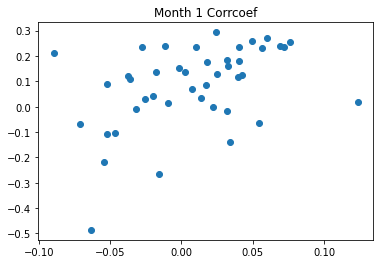

In [ ]:
corr_plt(1)

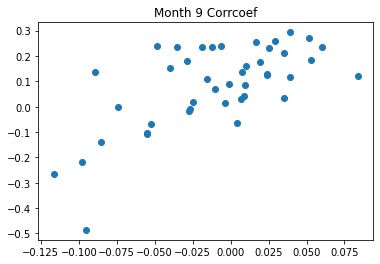

In [ ]:
corr_plt(9)

달을 치면 그 달과 연 등락률 간의 산포도 도출

In [ ]:
corr = []
for i in range(1,13):
  corr.append(np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1])
corr = pd.DataFrame(corr).set_index(np.arange(1,13))
corr.columns = ['corr']
corr

,corr
1,0.426281
2,0.279586
3,0.008398
4,0.401587
5,0.113758
6,0.629490
7,0.257850
8,0.046789
9,0.661264
10,0.246557


In [ ]:
for i in tb.columns:
  if stats.shapiro(tb.loc[:, i])[1] < 0.05: #p.value가 0.05 미만이면 귀무가설(자료는 정규성 만족) 기각
    print(i,'월 상관계수 :', np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1],' 정규성 불만족')
  else:
    print(i,'월 상관계수 :', np.corrcoef(tb.loc[:, i], tb.loc[:, 'sum'])[0,1], ' 정규성 만족')

1 월 상관계수 : 0.4262810651736813  정규성 만족
2 월 상관계수 : 0.27958593687402145  정규성 만족
3 월 상관계수 : 0.00839848589776603  정규성 불만족
4 월 상관계수 : 0.4015873158791138  정규성 만족
5 월 상관계수 : 0.11375768408604814  정규성 만족
6 월 상관계수 : 0.629489652256147  정규성 만족
7 월 상관계수 : 0.2578499144339063  정규성 만족
8 월 상관계수 : 0.04678910030970255  정규성 만족
9 월 상관계수 : 0.6612635205034538  정규성 만족
10 월 상관계수 : 0.24655659798750565  정규성 불만족
11 월 상관계수 : 0.29521459430444946  정규성 만족
12 월 상관계수 : 0.455277176346457  정규성 만족
sum 월 상관계수 : 0.9999999999999998  정규성 불만족


n < 5000 이므로 정규성 확인을 위해 샤피로 테스트를 수행하였다.

In [ ]:
df2 = data.drop(['Unnamed: 0', '오픈', '고가', '저가','거래량'], axis=1)
df2.columns = ['Date', 'Close', 'Change']
df2['year'] = df2['Date'].dt.year
df2['month'] = df2['Date'].dt.month
df2 = df2[df2['year'] != 1979].reset_index(drop=True)       #1979년 제거
df2 = df2[df2['year'] != 2023]
df2['log'] = np.log(df2['Close'] / df2['Close'].shift(1)) #로그수익률 계산
df2

,Date,Close,Change,year,month,log
0,1980-01-01,107.90,0.00%,1980,1,NaN
1,1980-01-02,105.80,-1.95%,1980,1,-0.019654
2,1980-01-03,105.20,-0.57%,1980,1,-0.005687
3,1980-01-04,106.50,1.24%,1980,1,0.012282
4,1980-01-07,106.80,0.28%,1980,1,0.002813
...,...,...,...,...,...,...
10841,2022-12-23,3844.82,0.59%,2022,12,0.005851
10842,2022-12-27,3829.25,-0.40%,2022,12,-0.004058
10843,2022-12-28,3783.22,-1.20%,2022,12,-0.012093
10844,2022-12-29,3849.28,1.75%,2022,12,0.017311


1달동안의 변동률이 앞으로의 11개월 변동률을 예상하는데 유용한지 여부 확인

In [ ]:
grp_df2 = df2.groupby(['year','month']).sum().reset_index()
grp_df2['lag_11'] = 0
for i in range(0, len(grp_df2)):
  grp_df2['lag_11'].iloc[i] = grp_df2['log'][i+1:i+12].sum()
grp_df2

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,year,month,Close,log,lag_11
0,1980,1,2547.00,0.056746,0.173232
1,1980,2,2422.10,-0.004388,0.130889
2,1980,3,2198.50,-0.107611,0.251532
3,1980,4,2162.40,0.040313,0.246390
4,1980,5,2261.50,0.045065,0.177514
...,...,...,...,...,...
511,2022,8,95646.95,-0.043367,-0.029638
512,2022,9,80860.93,-0.098049,0.068411
513,2022,10,78247.07,0.076835,-0.008424
514,2022,11,82267.26,0.052358,-0.060782


In [ ]:
corr2 = []
for i in range(0,12):
  if i >= 8:
    k = grp_df2.iloc[range(i-7, len(grp_df2) - 11, 12)]
    corr2.append([i-7, np.corrcoef(k['log'], k['lag_11'])[1,0], stats.shapiro(k['log'])[1] >= 0.05, stats.shapiro(k['lag_11'])[1] >= 0.05]) # i=8부터 1월이므로
  else:
    k = grp_df2.iloc[range(i, len(grp_df2) - 11, 12)] # 마지막 11개는 반영 안해야함
    corr2.append([i+5, np.corrcoef(k['log'], k['lag_11'])[1,0], stats.shapiro(k['log'])[1] >= 0.05, stats.shapiro(k['lag_11'])[1] >= 0.05]) # i=0일 때 5월이므로
corr2 = pd.DataFrame(corr2)
corr2.columns = ['month', 'Corr', 'Log Normality', 'lag11 Normality']
corr2.set_index('month', inplace=True)
corr2 = corr2.sort_index()
corr2

,Corr,Log Normality,lag11 Normality
month,,,
1,0.006548,False,False
2,-0.221429,False,False
3,0.271181,True,False
4,0.010874,True,False
5,0.157741,True,False
6,0.006548,False,False
7,-0.221429,False,False
8,0.271181,True,False
9,0.010874,True,False


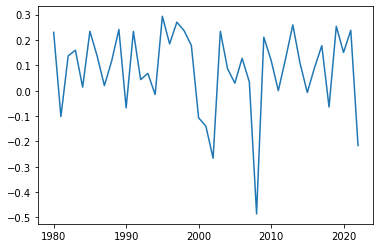

In [ ]:
plt.plot(tb.loc[:, 'sum' ])